['../memory_traces/llama-2-7b-chat-hf_8_1_4096_peft_commed_checkpoint_timedim-1_min_param1.txt-old', '../memory_traces/llama-2-7b-chat-hf_8_1_4096_peft_commed_none_timedim-1_min_param1.txt']
4252765200.0
36093764000.0


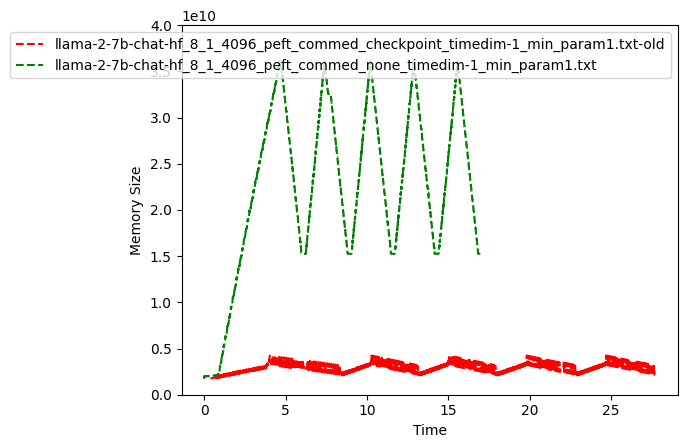

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import os

num_display = 3
trace_names = []
dr = "../memory_traces/"
files = os.listdir(dr)
files = [dr + item for item in files]
files = sorted(files, key=os.path.getctime)
filenames = files[-num_display:]
print(filenames)
for filename in filenames:
    if not os.path.exists(f"../memory_traces/{filename}"):
        print("not exist", filename)
        continue
    trace_names.append(filename)
traces = []
for trace_name in trace_names:
    # print(trace_name)
    filename = "../memory_traces/{}".format(trace_name)
    traces.append(np.loadtxt(filename, dtype=np.float32))
    traces[-1][:, 1] -= traces[-1][0, 1]
    mems = traces[-1][:, 0]
    ts = traces[-1][:, 1]
    ts = ts[(mems == np.max(mems))]
    interval = ts[1:] - ts[:-1]
    interval = interval[interval > 1e-3]

colors = ["r", "g", "b", "c", "m", "y", "k"]
labels = [name.strip("/").split("/")[-1] for name in filenames]
for it, trace in enumerate(traces):
    plt.plot(trace[:, 1], trace[:, 0], "--", color=colors[it], label=labels[it])
    print(np.max(trace))

plt.ylim(bottom=0)  # set y-axis starting from 0
plt.ylim(top=4e10)  # set y-axis starting from 0
plt.title(f"")
plt.xlabel("Time")
plt.ylabel("Memory Size")
plt.legend()
plt.show()